# Тестовое задание на вакансию Junior Data Scientist, Scorista. 08.2019

## Имеется некая таблица, нужно разработать модель для предсказания события Status

### В данном задании, я буду использовать три алгоритма классификации, наиболее мне известные: Decision Trees, K-Neighbours и Random Forest. Будет рассчитана вероятность правильного предсказания по всем трем алгоритмам. 

##### Загрузка библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



#### Загрука данных таблицы

In [3]:
data = 'data.xlsx'

In [4]:
x1 = pd.ExcelFile(data)

In [5]:
print(x1.sheet_names)

['Исходные данные', 'Распределение']


In [7]:
x1

In [6]:
df1 = x1.parse('Исходные данные')

In [7]:
df1

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75,STATUS,Балл
0,0.333333,0.014545,0.666667,153923,0,0.000000,0.000000,153923,153923,0,...,0.500000,1059,0.003636,0,0,0,0,0,1,NaN
1,0.727273,0.309942,0.954545,338179,2,0.866667,14296.266670,285955,22963,3,...,0.022727,41,0.005848,0,0,1,2,0,0,NaN
2,0.000000,0.000000,0.000000,0,1,0.000000,0.000000,0,0,1,...,0.000000,6,0.000000,0,0,0,0,0,0,NaN
3,1.000000,1.000000,1.000000,38969,3,2.666667,12989.666670,50977,30325,3,...,0.000000,40,0.000000,0,0,0,0,0,0,NaN
4,1.000000,0.206897,0.666667,3000,1,1.000000,1500.000000,8000,3000,1,...,0.333333,6,0.137931,0,0,0,0,0,1,NaN
5,0.000000,0.653846,1.000000,0,3,4.000000,10117.000000,0,0,3,...,0.333333,59,0.000000,1,2,2,0,1,0,NaN
6,0.608696,0.441520,0.782609,580700,1,0.000000,0.000000,651014,352291,1,...,0.304348,557,0.002924,0,0,0,0,0,1,NaN
7,0.571429,0.531915,0.571429,2452,0,0.000000,0.000000,25000,2452,0,...,0.142857,9,0.063830,0,0,0,0,0,0,NaN
8,0.181818,0.061497,0.818182,0,0,0.000000,0.000000,0,0,0,...,0.818182,473,0.013369,0,0,0,0,0,1,NaN
9,0.777778,0.543568,0.833333,998292,0,0.000000,0.000000,696176,245497,0,...,0.333333,40,0.006224,0,0,0,0,0,0,NaN


In [8]:
df1.describe()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75,STATUS,Балл
count,6394.000000,6394.000000,6394.000000,6.394000e+03,6394.000000,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,...,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,0.0
mean,0.630109,0.453784,0.774382,2.735900e+05,2.731467,1.189705,8.975241e+03,2.407472e+05,1.211434e+05,3.221927,...,0.348230,410.21442,0.067832,0.553331,1.148420,0.728495,0.271505,0.553331,0.322646,NaN
std,0.292184,0.278495,0.257964,9.505452e+05,4.527406,1.620388,3.680669e+04,6.999517e+05,6.823942e+05,5.521740,...,0.545786,768.08398,0.151400,1.591975,3.419521,1.808814,1.007299,1.591975,0.467525,NaN
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.500000,0.214286,0.666667,3.070250e+03,0.000000,0.000000,0.000000e+00,5.000000e+03,2.600250e+03,0.000000,...,0.000000,13.00000,0.002064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.666667,0.454716,0.848485,4.177050e+04,1.000000,0.777778,3.304286e+03,4.700000e+04,2.037900e+04,1.000000,...,0.142857,42.00000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.857143,0.690931,1.000000,2.163698e+05,3.000000,1.555556,1.002923e+04,2.119912e+05,8.204350e+04,4.000000,...,0.500000,372.00000,0.055046,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
max,1.000000,1.000000,1.000000,4.297562e+07,52.000000,12.000000,1.790789e+06,3.053000e+07,4.241549e+07,72.000000,...,11.000000,4571.00000,1.000000,29.000000,93.000000,24.000000,15.000000,29.000000,1.000000,NaN


In [9]:
type(df1)

pandas.core.frame.DataFrame

In [10]:
type(df1.values)

numpy.ndarray

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 77 columns):
Factor_1     6394 non-null float64
Factor_2     6394 non-null float64
Factor_3     6394 non-null float64
Factor_4     6394 non-null int64
Factor_5     6394 non-null int64
Factor_6     6394 non-null float64
Factor_7     6394 non-null float64
Factor_8     6394 non-null int64
Factor_9     6394 non-null int64
Factor_10    6394 non-null int64
Factor_11    6394 non-null float64
Factor_12    6394 non-null int64
Factor_13    6394 non-null int64
Factor_14    6394 non-null int64
Factor_15    6394 non-null int64
Factor_16    6394 non-null int64
Factor_17    6394 non-null float64
Factor_18    6394 non-null float64
Factor_19    6394 non-null int64
Factor_20    6394 non-null float64
Factor_21    6394 non-null float64
Factor_22    6394 non-null float64
Factor_23    6394 non-null float64
Factor_24    6394 non-null float64
Factor_25    6394 non-null int64
Factor_26    6394 non-null float64
Factor_

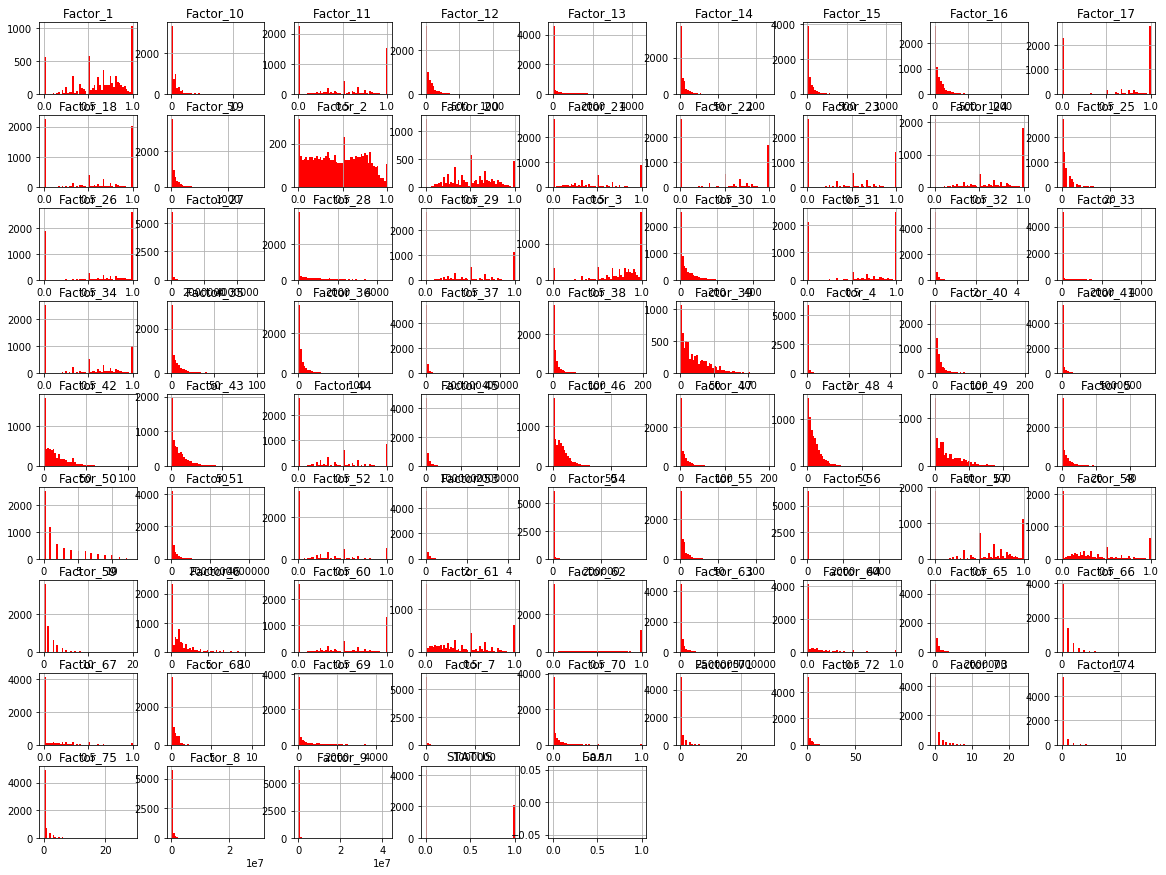

In [11]:
df1.hist(bins=50, figsize=(20,15), color='r')
plt.show()
         

#### Смотрим на количество нулей и едениц в колонке STATUS

In [14]:
df1.STATUS.value_counts()

0    4331
1    2063
Name: STATUS, dtype: int64

#### Разбиваем нашу выборку на features и targets

In [15]:
features = df1.iloc[:,0:-2]
targets = df1.iloc[:,-2]

In [16]:
nfeatures = np.array(features)
ntargets = np.array(targets)

#### Нашу выборку разделяем на train и holdout. Вначале мы обучаем train потом теститруем ее на отложенной выборке.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(nfeatures, ntargets, test_size=0.33, 
                                                    random_state=26, stratify=ntargets)

#### При этом наша отложенная выборка не должна сильно отличаться от обучающей. В некоторых задачах машинного обучения такое разбиение(70 на 30) будет исчерпывающим, так как размер таблицы может быть очень большим. В данной задаче мы будем также проводить кросс-валидацию, чтобы невелировать эффект от случайного разбиения.

In [18]:
nfeatures.shape, ntargets.shape

((6394, 75), (6394,))

In [19]:
X_train.shape, X_test.shape

((4283, 75), (2111, 75))

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
f_tree = DecisionTreeClassifier(max_depth = 5, random_state = 17)

In [31]:
f_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [32]:
from sklearn.metrics import accuracy_score

#### Качество прогнгозов проверяем с помощью доли правильных ответов

In [38]:
f_tree_pred = f_tree.predict(X_test)
accuracy_score(y_test, f_tree_pred)

0.6892468024632875

#### Настроим параметры дерева для кросс-валидации

In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [41]:
f_tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

In [44]:
f_tree_grid = GridSearchCV(f_tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [45]:
f_tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   26.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             pre_dispatch='2*n_jobs

In [48]:
f_tree_grid.best_params_

{'max_depth': 4, 'max_features': 9}

In [49]:
f_tree_grid.best_score_


0.7030119075414429

In [50]:
accuracy_score(y_test, f_tree_grid.predict(X_test))

0.6911416390336333

## k-nearest neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
f_knn = KNeighborsClassifier(n_neighbors=10)

In [53]:
f_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [55]:
f_knn_pred = f_knn.predict(X_test)
accuracy_score(y_test, f_knn_pred)

0.6693510184746566

#### Настроим число соседей в KNN

In [56]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
f_knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [58]:
f_knn_params = {'knn__n_neighbors': range(1, 10)}

In [60]:
f_knn_grid = GridSearchCV(f_knn_pipe, f_knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [61]:
f_knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [62]:
f_knn_grid.best_params_, f_knn_grid.best_score_

({'knn__n_neighbors': 8}, 0.6934391781461592)

In [65]:
accuracy_score(y_test, f_knn_grid.predict(X_test))

0.6788252013263856

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

0.7058112483706002


In [67]:
forest_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

In [68]:
forest_grid = GridSearchCV(forest, forest_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

In [69]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=17,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_dep

In [70]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 8, 'max_features': 18}, 0.7153864113938828)

In [71]:
accuracy_score(y_test, forest_grid.predict(X_test))

0.6982472761724301

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

### Промежуточный вывод: получена точность прогнозирования с учетом подобра оптимальных параметров. У всех трех алгоритмов она приблизительно одинакова: ≈ 0.69. Одним из дальнейших действий будет исключение не важных features из таблицы, проработка алгоритма с новым набором параметров и сравнение результата с предыдущими.

In [78]:
forest.feature_importances_

array([0.02026925, 0.0260821 , 0.02316122, 0.01697637, 0.00846851,
       0.0135056 , 0.01606174, 0.02074418, 0.01939215, 0.00801738,
       0.00831677, 0.01518752, 0.0241842 , 0.00686882, 0.01424721,
       0.01941124, 0.00569511, 0.00802363, 0.01488154, 0.01471657,
       0.00656056, 0.00429232, 0.00710198, 0.0057396 , 0.00503151,
       0.00667107, 0.01881158, 0.01799981, 0.00750219, 0.01669242,
       0.00772737, 0.02325858, 0.01603588, 0.00925304, 0.01835142,
       0.00735371, 0.01139665, 0.00872271, 0.01582158, 0.01019048,
       0.01548688, 0.01500909, 0.01706364, 0.01085957, 0.02569639,
       0.0191797 , 0.00809121, 0.02067631, 0.0138858 , 0.00577988,
       0.01771982, 0.00724837, 0.0202867 , 0.00548354, 0.00974861,
       0.00746535, 0.01020695, 0.0274289 , 0.00469415, 0.00872674,
       0.01251119, 0.00569141, 0.03001828, 0.01518277, 0.02197903,
       0.00419698, 0.01165478, 0.01649166, 0.03618328, 0.01872723,
       0.00517962, 0.00635162, 0.0086089 , 0.0024306 , 0.00532

## P.S. В данной работе не использовался алгоритм логистической регрессии, при повторном приглашении на интервью с разбором задания, обязаюсь предоставить попытку решения данной задачи с использованием логистической регрессии. Считаю, что этот ал